In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage
import numpy as np
import cv2
path = '../Imagens/'

In [22]:
img = cv2.imread(path + 'ic.png', cv2.IMREAD_COLOR)
img2 = cv2.imread(path + 'ufal.png', cv2.IMREAD_COLOR)

In [3]:
def print_image(img):
    img2 = img[:,:,::-1]
    plt.imshow(img2)

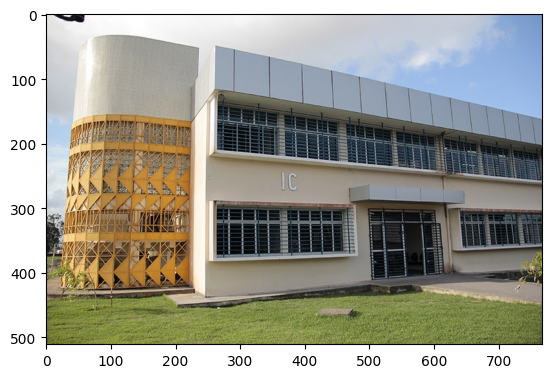

In [7]:
print_image(img)


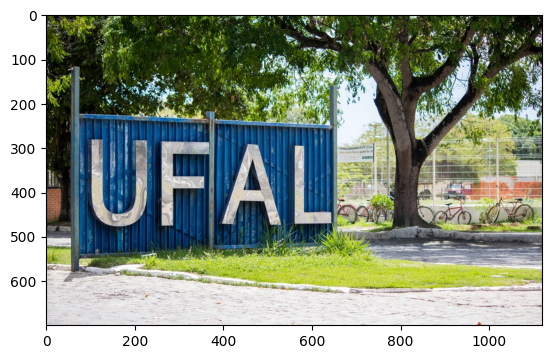

In [6]:
print_image(img2)

## Crop and flip an image using Numpy array indexing.

Crop da imagem:


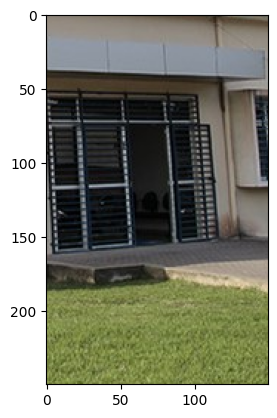

In [12]:
print("Crop da imagem:")
img_crop = img[250:500,500:650]
print_image(img_crop)


Flip vertical da imagem:


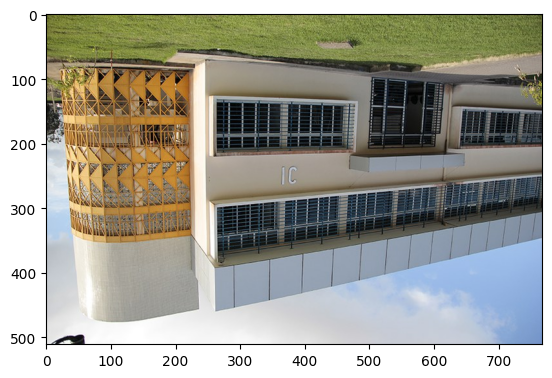

In [13]:
print(("\nFlip vertical da imagem:"))
img_flip_vert = np.flipud(img)
print_image(img_flip_vert)


Flip horizontal da imagem:


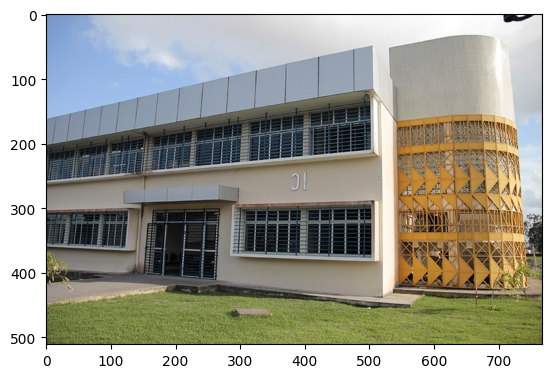

In [14]:
print(("\nFlip horizontal da imagem:"))
img_flip_horiz = np.fliplr(img)
print_image(img_flip_horiz)

##  Implement image translation using Numpy and OpenCV.

Dimensoes da imagem original:  (511, 768)


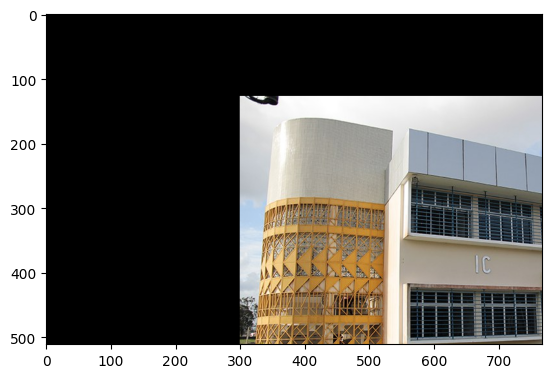

In [16]:
height, width, = img.shape[:2]

print("Dimensoes da imagem original: ", img.shape[:2])

x_new = 300
y_new = 128

matrix_transform = np.float32([[1, 0, x_new],
                [0, 1, y_new]])

img_translate = cv2.warpAffine(img, matrix_transform, (width,height))
#Paramentros (imagems, matriz de transformação, e dimensoes da imagem)

print_image(img_translate)

## Implement image rotation using Numpy and OpenCV.

Matriz de rotação:
 [[  0.70710678   0.70710678 -68.19478657]
 [ -0.70710678   0.70710678 346.36322138]]



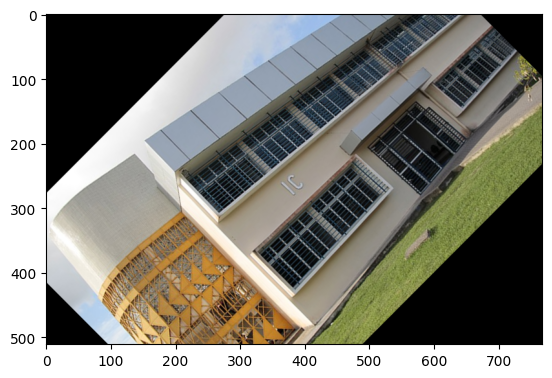

In [17]:
angle = 45
height, width, = img.shape[:2]

matrix_transform = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
#Dividindo por dois pois assim o eixo de rotação fica no meio da imagem

print("Matriz de rotação:\n", matrix_transform)

img_rotate = cv2.warpAffine(img, matrix_transform, (img.shape[1], img.shape[0]))
#Paramentros (imagems, matriz de transformação, e dimensoes da imagem)

print()
print_image(img_rotate)

## Implement image resizing using OpenCV.

Dimensoes originais:  (511, 768)
Novas dimensoes: (1800, 500)


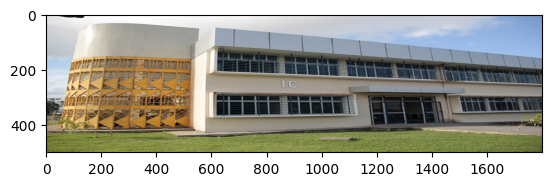

In [18]:
print("Dimensoes originais: ", img.shape[:2])
print("Novas dimensoes: (1800, 500)")

new_dimensions = (1800, 500)

img2= cv2.resize(img, new_dimensions)
print_image(img2)

## Implement bitwise operations: AND, OR, XOR.

Redimensionando imagem 1:


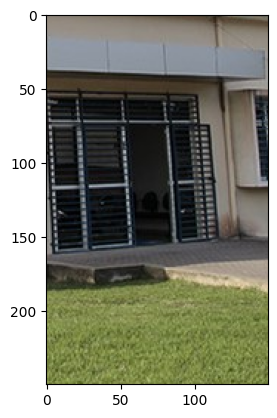

In [20]:
print("Redimensionando imagem 1:")
new_img1 = img[250:500,500:650]
print_image(new_img1)

Redimensionando imagem 2:


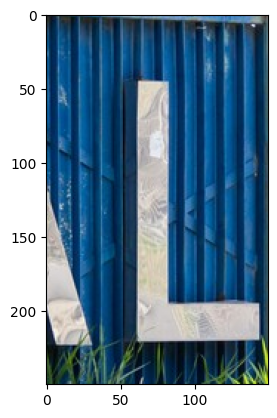

In [23]:
print("Redimensionando imagem 2:")
new_img2 = img2[250:500,500:650]
print_image(new_img2)

### AND

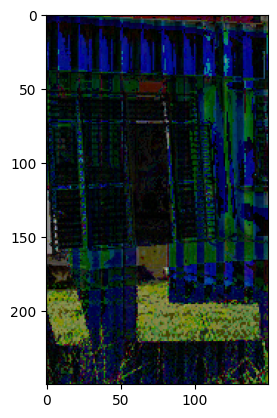

In [24]:
new_img3 = new_img1 & new_img2
print_image(new_img3)

### OR

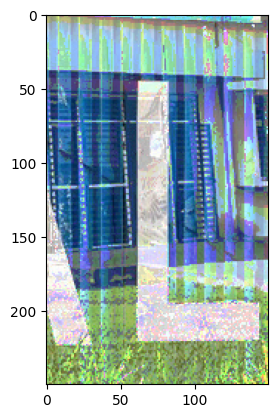

In [25]:
new_img3 = new_img1 | new_img2
print_image(new_img3)

### XOR

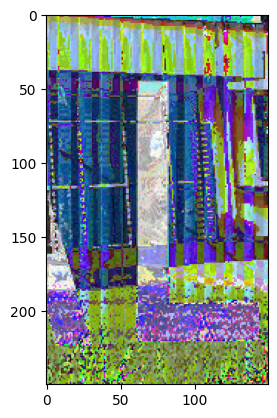

In [26]:
new_img3 = cv2.bitwise_xor(new_img1,new_img2)
print_image(new_img3)

## Implement the "mask" operation, where a third image 'h' contains only a Region of Interest (ROI -- defined by the second image mask 'g') obtained from the input image 'f'. Note that this Region can be of any shape.

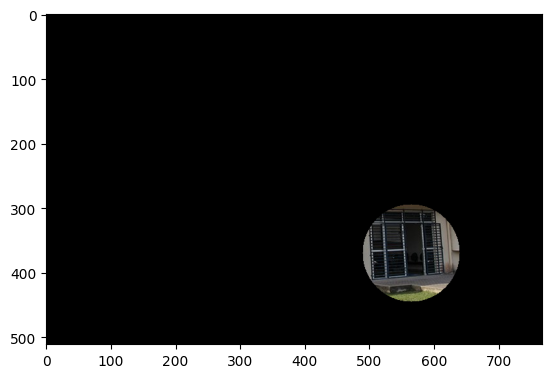

In [35]:
mask = np.zeros(img.shape[:2], dtype="uint8")
cv2.circle(mask, (565, 370), 75, 255, -1)
img2 = cv2.bitwise_and(img, img, mask=mask)
print_image(img2)